# **Tensor Flow**

[Tensor Flow Course 1 - Youtube](https://www.youtube.com/watch?v=tPYj3fFJGjk)  |   [Tensor Flow Course 2 - Youtube](https://www.youtube.com/watch?v=tpCFfeUEGs8&list=PL6vjgQ2-qJFfU2vF6-lG9DlSa4tROkzt9&index=1&t=115s)



---

## What is TensorFlow?

[TensorFlow](https://www.tensorflow.org/) is an open-source end-to-end machine learning library for preprocessing data, modelling data and serving models (getting them into the hands of others).

## Why use TensorFlow?

Rather than building machine learning and deep learning models from scratch, it's more likely you'll use a library such as TensorFlow. This is because it contains many of the most common machine learning functions you'll want to use.




# **Ch-01: Tensor Flow Fundamentals**

In [ ]:
import tensorflow as tf
print(tf.__version__)


### Creating Tensors with `tf.constant()`

As mentioned before, in general, you usually won't create tensors yourself. This is because TensorFlow has modules built-in (such as [`tf.io`](https://www.tensorflow.org/api_docs/python/tf/io) and [`tf.data`](https://www.tensorflow.org/guide/data)) which are able to read your data sources and automatically convert them to tensors and then later on, neural network models will process these for us.

But for now, because we're getting familar with tensors themselves and how to manipulate them, we'll see how we can create them ourselves.

We'll begin by using [`tf.constant()`](https://www.tensorflow.org/api_docs/python/tf/constant).

In [ ]:
scalar = tf.constant(7)
scalar

In [ ]:
scalar.ndim

In [ ]:
vector = tf.constant([10,10])
vector

In [ ]:
vector.ndim

In [ ]:
matrix = tf.constant([[1,2,3],
                      [5,6,8]])
matrix

In [ ]:
matrix.ndim

In [ ]:
another_matrix = tf.constant([[12.,2,5.],
                              [34,7,1]])
another_matrix

In [ ]:
another_matrix.ndim

In [ ]:
another_matrix2= tf.constant([[12.,2,5.],
                              [34,7,1],
                              [5,3,1]], dtype=tf.float16)
another_matrix2

In [ ]:
another_matrix2.ndim

In [ ]:
tensor = tf.constant([[[1,2,3],
                       [4,5,6],
                       [5,6,7]]])
tensor

In [ ]:
tensor.ndim

> 🔑 **Note:** For now, you don't need to know too much about the different ranks of tensors (but we will see more on this later). The important point is knowing tensors can have an unlimited range of dimensions (the exact amount will depend on what data you're representing).

### Creating Tensors with `tf.Variable()`

You can also (although you likely rarely will, because often, when working with data, tensors are created for you automatically) create tensors using [`tf.Variable()`](https://www.tensorflow.org/api_docs/python/tf/Variable).

The difference between `tf.Variable()` and `tf.constant()` is tensors created with `tf.constant()` are immutable (can't be changed, can only be used to create a new tensor), where as, tensors created with `tf.Variable()` are mutable (can be changed).

In [ ]:
changeabletensor = tf.Variable([10,6])
unchangeabletensor = tf.constant([10,6])
changeabletensor, unchangeabletensor


In [ ]:
changeabletensor[0]

In [ ]:
changeabletensor[0] = 5

In [ ]:
changeabletensor[0].assign(4)

In [ ]:
unchangeabletensor[0] = 7

In [ ]:
unchangeabletensor[0].assign(4)

Which one should you use? `tf.constant()` or `tf.Variable()`?

It will depend on what your problem requires. However, most of the time, TensorFlow will automatically choose for you (when loading data or modelling data).

### Creating random tensors

Random tensors are tensors of some abitrary size which contain random numbers.

Why would you want to create random tensors? 

This is what neural networks use to intialize their weights (patterns) that they're trying to learn in the data.

For example, the process of a neural network learning often involves taking a random n-dimensional array of numbers and refining them until they represent some kind of pattern (a compressed way to represent the original data).

**How a network learns**
![how a network learns](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/00-how-a-network-learns.png)
*A network learns by starting with random patterns (1) then going through demonstrative examples of data (2) whilst trying to update its random patterns to represent the examples (3).*

We can create random tensors by using the [`tf.random.Generator`](https://www.tensorflow.org/guide/random_numbers#the_tfrandomgenerator_class) class.

In [ ]:
# creating random tensors
random_1 = tf.random.Generator.from_seed(7)
random_1 = random_1.normal(shape=(3,2))
random_1
random_2 = tf.random.Generator.from_seed(7)
random_2 = random_2.normal(shape=(3,2))
random_1, random_2, random_1 == random_2

In [ ]:
# shuffle the order of elements in a tensor
not_shuffled = tf.constant([[12,7],
                            [2,3],
                            [6,7]])
tf.random.shuffle(not_shuffled)

In [ ]:
s# shuffle
tf.random.set_seed(42) # global random seed
tf.random.shuffle(not_shuffled, seed=42)

The random tensors we've made are actually [pseudorandom numbers](https://www.computerhope.com/jargon/p/pseudo-random.htm) (they appear as random, but really aren't).

If we set a seed we'll get the same random numbers (if you've ever used NumPy, this is similar to `np.random.seed(42)`). 

Setting the seed says, "hey, create some random numbers, but flavour them with X" (X is the seed).

What do you think will happen when we change the seed?


It's due to rule #4 of the [`tf.random.set_seed()`](https://www.tensorflow.org/api_docs/python/tf/random/set_seed) documentation.

> "4. If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence."

`tf.random.set_seed(42)` sets the global seed, and the `seed` parameter in `tf.random.shuffle(seed=42)` sets the operation seed.

Because, "Operations that rely on a random seed actually derive it from two seeds: the global and operation-level seeds. This sets the global seed."

In [ ]:
tf.ones([10,7])

In [ ]:
tf.zeros([5,5])

In [ ]:
tf.zeros(shape=(5,5))

In [ ]:
# turn numpy array into tensors
# diff between them that tensor run on gpu
import numpy as np 

np_a = np.arange(1,25, dtype=np.int32)
np_a

In [ ]:
a = tf.constant(np_a)
a

In [ ]:
a = tf.constant(np_a, shape=(2,3,4))
a

In [ ]:
# getting information from tensor
    # shape
    # axis of dim
    # Rank
    # size

In [ ]:
# rank is dim

rank_4 = tf.zeros(shape= (2,3,4,5))
rank_4

In [ ]:
rank_4[0]

In [ ]:
rank_4.ndim, rank_4.shape, tf.size(rank_4)

In [ ]:
# get varios attribute
# Get various attributes of tensor
print("Datatype of every element:", rank_4.dtype)
print("Number of dimensions (rank):", rank_4.ndim)
print("Shape of tensor:", rank_4.shape)
print("Elements along axis 0 of tensor:", rank_4.shape[0])
print("Elements along last axis of tensor:", rank_4.shape[-1])
print("Total number of elements (2*3*4*5):", tf.size(rank_4).numpy()) # .numpy() converts to NumPy array

In [ ]:
# indexing  tensors

rank_4[:2,:2,:2,:2]

In [ ]:
rank_4[:1]

In [ ]:
rank_4[:1,:1,:1]

In [ ]:
rank_4[:1,:1,:1,:1]

In [ ]:
rank_4[:1,:1,:,:1]

In [ ]:
rank_4[:1,:,:,:1]

In [ ]:
rank_2 = tf.constant([[1,2],
                     [4,5]])
rank_2

In [ ]:
some_list = [1,2,3,4]

In [ ]:
some_list, some_list[-1]

In [ ]:
# get last item of each of row of our 2 tensor
rank_2[:,-1]


You can also add dimensions to your tensor whilst keeping the same information present using `tf.newaxis`. 

In [ ]:
rank_3 = tf.zeros(shape=(2,2,2))
rank_3.ndim

In [ ]:
rank_3

In [ ]:
rank_2

In [ ]:
rank_3 = rank_2[..., tf.newaxis]
rank_3

In [ ]:
tf.expand_dims(rank_2, axis=1)

In [ ]:
tf.expand_dims(rank_2, axis=-1)

> #### manipulating tensors


In [ ]:
tensor = tf.constant([[20,7], [3,4]])
tensor +10

In [ ]:
tensor = tensor+10
tensor

In [ ]:
tf.multiply(tensor, 10) ## this technique faster on GPU that the tradition way

In [ ]:
tensor = tensor * (-10)
tensor

In [ ]:
tf.math.abs(tensor)

In [ ]:
# matrix multiplication

In [ ]:
tensor2 = tf.linalg.matmul(tensor, tensor)
tensor2

In [ ]:
# wise element
tensor * tensor

In [ ]:
tensor @ tensor

In [ ]:
tensor3 = tf.constant([[1,2],[3,4],[5,6]])
tensor4 = tf.constant([[4,5],[8,9],[1,3]])
tensor3, tensor4


In [ ]:
tensor3 @ tensor4


In [ ]:
tensor3 * tensor4


In [ ]:
tf.matmul(tensor3 ,tensor4)


In [ ]:
# change shape 
tf.reshape(tensor3, shape=(2,3))

In [ ]:
tensor3.shape

In [ ]:
tensor4.shape

In [ ]:
tensor4 = tf.reshape(tensor4, shape=(2,3))

In [ ]:
tensor4.shape

In [ ]:
tensor3 @ tensor4


As you can see, the outputs of `tf.reshape()` and `tf.transpose()` when called on `Y`, even though they have the same shape, are different.

This can be explained by the default behaviour of each method:
* [`tf.reshape()`](https://www.tensorflow.org/api_docs/python/tf/reshape) - change the shape of the given tensor (first) and then insert values in order they appear (in our case, 7, 8, 9, 10, 11, 12).
* [`tf.transpose()`](https://www.tensorflow.org/api_docs/python/tf/transpose) - swap the order of the axes, by default the last axis becomes the first, however the order can be changed using the [`perm` parameter](https://www.tensorflow.org/api_docs/python/tf/transpose).


---
> ### Changing the datatype of a tensor

Sometimes you'll want to alter the default datatype of your tensor. 

This is common when you want to compute using less precision (e.g. 16-bit floating point numbers vs. 32-bit floating point numbers). 

Computing with less precision is useful on devices with less computing capacity such as mobile devices (because the less bits, the less space the computations require).

You can change the datatype of a tensor using [`tf.cast()`](https://www.tensorflow.org/api_docs/python/tf/cast).

In [ ]:
tf.reshape(tensor3, shape=(3,2)).shape, tensor4

In [ ]:
# transpose
tensor4, tf.transpose(tensor4), tf.reshape(tensor4,shape=(3,2))

In [ ]:
tensor4= tf.reshape(tensor4, shape=(3,2))
tensor4.shape

In [ ]:
tensor3.shape

In [ ]:
# mat mal with transpose
tf.matmul(tf.transpose(tensor3), tensor4)

In [ ]:
# dot product [tf.tensordot() and tf.matmul()]
print(tensor3.shape, tensor4.shape)
tf.tensordot(tf.transpose(tensor3), tensor4, axes=1)

In [ ]:
# changing data type
tf.__version__


In [ ]:
c = tf.zeros(shape=(2,2))
c

In [ ]:
d = tf.constant([[1,2],[4,5]])
d.dtype

In [ ]:
b = tf.constant([1.6,2,3])
b.dtype

In [ ]:
b  = tf.cast(b, dtype=tf.float16)
b.dtype

In [ ]:
# aggregating


In [ ]:
d = d*-2

In [ ]:
d

In [ ]:
tf.abs(d)

In [ ]:
import numpy as np
x = tf.constant(np.random.randint(0,100,size=50))
x

In [ ]:
tf.size(x) ,x.shape, x.ndim

In [ ]:
tf.reduce_min(x)  # mnimums

In [ ]:
tf.reduce_max(x)

In [ ]:
tf.reduce_mean(x)

In [ ]:
tf.reduce_sum(x)

In [ ]:
import tensorflow_probability as tfp

In [ ]:
tfp.stats.variance(x)

In [ ]:
tf.math.reduce_std(x)

In [ ]:
tf.math.reduce_std(tf.cast(x, dtype=tf.int32))

In [ ]:
tf.math.reduce_std(tf.cast(x, dtype=tf.float32))

In [ ]:
tf.math.reduce_variance(x)

In [ ]:
tf.math.reduce_variance(tf.cast(x, dtype=tf.float32))

In [ ]:
# find the positionam maxium and minimum 
    

In [ ]:
v = tf.random.uniform(shape=[50])
v

In [ ]:
tf.argmax(v)

In [ ]:
v[tf.argmax(v)]

In [ ]:
tf.reduce_max(v)

In [ ]:
v[tf.argmax(v)] == tf.reduce_max(v)

In [ ]:
tf.argmin(v)

In [ ]:
v[tf.argmin(v)]

In [ ]:
# squeezimg tensor


In [ ]:
tf.random.set_seed(42)
g = tf.constant(tf.random.uniform(shape=[50]), shape=(1,1,1,50))
g

In [ ]:
g.ndim, g.shape

In [ ]:
g_squeezed = tf.squeeze(g)

In [ ]:
g_squeezed.shape


In [ ]:
g_squeezed

In [ ]:
# one hot encoding 


In [ ]:
some_List = [0,1,2,3] # r,g,b,y
tf.one_hot(some_List, depth=4)

In [ ]:
tf.one_hot(some_List, depth=4, on_value="i love mariam", off_value="mariam love me")

In [ ]:
# squaring, log, root
n = tf.range(1,10)
n

In [ ]:
tf.square(n)

In [ ]:
tf.sqrt(n)

In [ ]:
tf.sqrt(tf.cast(n, dtype=tf.float32))

In [ ]:
tf.math.log(n)

In [ ]:
tf.math.log(tf.cast(n, dtype=tf.float32))

> ### Tensor and Numpy

In [ ]:
j = tf.constant(np.array([3.,4.,5.]))
j

In [ ]:
np.array(j)

In [ ]:
type(np.array(j))

In [ ]:
j.numpy(), type(j.numpy())

In [ ]:
j = tf.constant([3.])

j.numpy()[0]

In [ ]:
numpy_j = tf.constant(np.array([10.,2.,5.]))
tensor_j  =  tf.constant([10.,2.,5.])
numpy_j.dtype, tensor_j.dtype

# **Ch-02: Regression with NN on Tensor Flow**

In [ ]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [ ]:
y == X + 10

> ### Input and Output Shapes

In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


In [ ]:
house_info.shape, house_price.shape

In [ ]:
inputshape= X[0].shape
outputshape = y[0].shape
inputshape, outputshape

In [ ]:
x[0].ndim

In [ ]:
X = tf.constant(X)
y=  tf.constant(y)
X, y

In [ ]:
inputshape= X[0].shape
outputshape = y[0].shape
inputshape, outputshape

In [ ]:
plt.scatter(X,y)

> ##### Steps in modeling with TensorFlow


Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.

> **Note:** If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.
>
> In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`. 

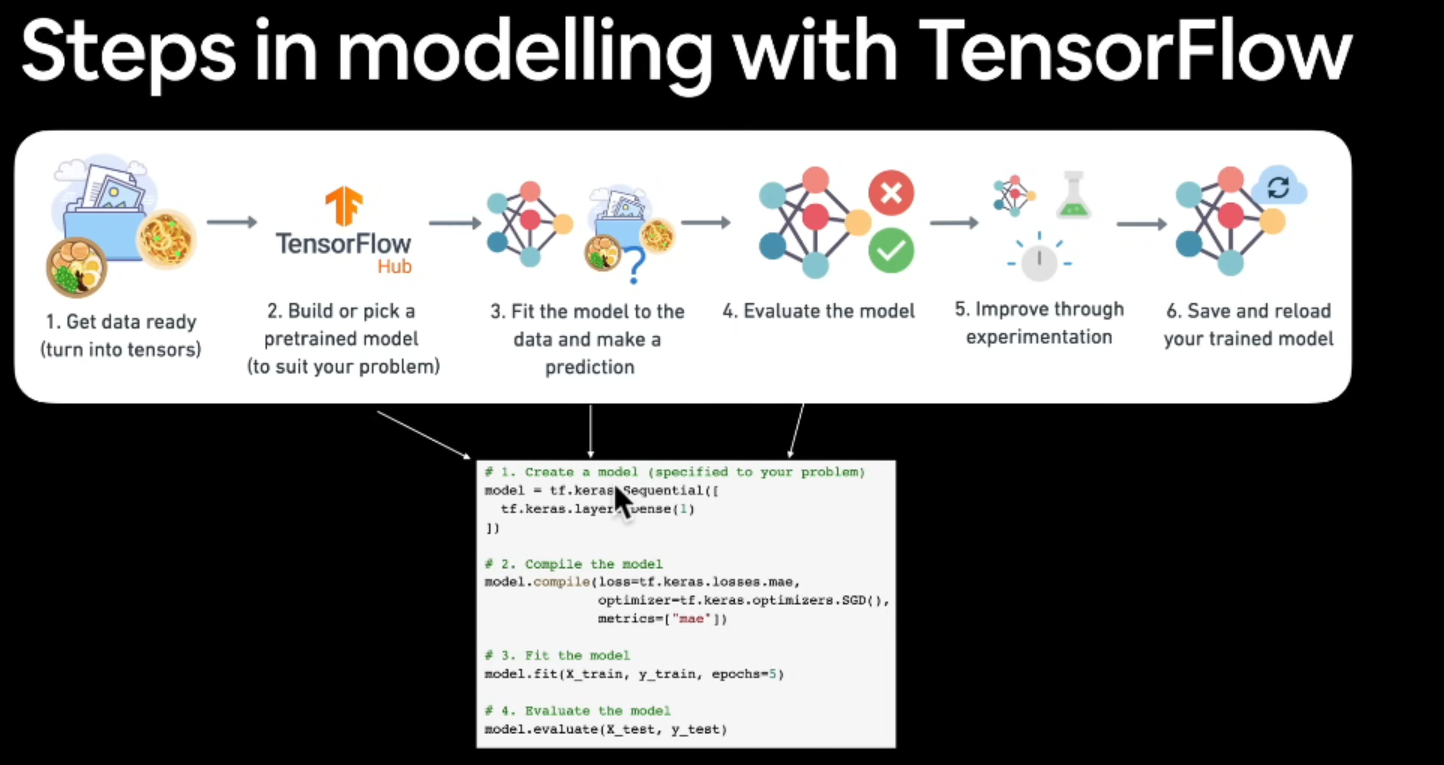

In [ ]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

X = tf.constant(X)
y=  tf.constant(y)
X, y, X.ndim, y.ndim

In [ ]:
tf.random.set_seed(42)

# 1 create model using seq API
    # there is another method using add layer() function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # we take one calue from x and output one value
])

#2. compile
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. file the model "# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+"
model.fit(tf.expand_dims(X, axis=-1),y, epochs=6)   
# model.fit(X,y, epochs=5)

"""  
The issue here is that model.fit(X, y, epochs=5) will break because TensorFlow expects the input
 X to have a shape of (batch_size, features), but X is currently a 1D tensor. You need to reshape
 X so it has an extra dimension to meet this expectation. This can be achieved using tf.
 expand_dims(X, axis=-1)
"""


In [ ]:
tf.expand_dims(X, axis=-1)

In [ ]:
X.shape, X.dtype, y.shape, y.dtype

In [ ]:
X, y

In [ ]:
# try and make prediction

y_pred = model.predict([17.0])
y_pred

In [ ]:
y_pred + 11

> ##### Improving the model


How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [ ]:
# rebuild the mode
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


In [ ]:
X,y 

In [ ]:
model.predict([12.5]) # 22.5

In [ ]:
    # rebuild the mode
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
model.predict([12.5]) # 22.5


In [ ]:
    # rebuild the mode
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
model.predict([12.5]) # 22.5


> ##### Evaluating model

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize." 

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

In [ ]:
X = tf.range(-100,100,4)
X

In [ ]:
y = X+10
y

In [ ]:
plt.scatter(X,y)

In [ ]:
len(X)

In [ ]:
X_train = X[:40]
y_train = X[:40]
X_test = X[40:]
y_test = X[40:]
len(X_train ), len(y_train ), len(X_test  ) ,len(y_test )


In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Testing data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()


In [ ]:
def mae(y_test, y_pred):
    tf.metrics.mean_absolute_error(y_test, y_pred)
def mse(y_test, y_pres):
    return tf.metrics.mean_squared_error(y_test, y_pred)


def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels= y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();    

In [ ]:
    # rebuild the mode
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
    
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


In [ ]:
y_pred = model.predict(X_test)
plot_predictions(predictions=y_pred)

>> ##### Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

> 📖 **Resource:** But as you build more models, you'll want to look into using tools such as:
* [**TensorBoard**](https://tensorboard.dev/) - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* [**Weights & Biases**](https://www.wandb.com/) - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).


>> ##### Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [ ]:
model.summary()

| Model Name          | Layer (type)      | Output Shape  | Param # | Explanation                                                                                                      |
|---------------------|-------------------|---------------|---------|------------------------------------------------------------------------------------------------------------------|
| `sequential_23`     | `dense_26 (Dense)` | (None, 100)  | 200     | The first dense layer with 100 units. `(None, 100)` output shape means variable batch size and 100 outputs.      |
|                     |                   |               |         | 200 parameters: 100 weights + 100 biases (100 * 1 input + 100 biases).                                          |
|                     | `dense_27 (Dense)` | (None, 1)    | 101     | The second dense layer with 1 unit. `(None, 1)` output shape means variable batch size and 1 output.            |
|                     |                   |               |         | 101 parameters: 100 weights from the previous layer’s 100 units + 1 bias.                                       |
| **Total Params**    |                   |               | 301     | Total number of parameters in the model.                                                                         |
| **Trainable Params**|                   |               | 301     | All parameters are trainable, meaning they are updated during training.                                          |
| **Non-trainable Params** |           |               | 0       | No non-trainable parameters (e.g., frozen layers).                                                               |





In [ ]:
from tensorflow.keras.utils import plot_model


In [ ]:
plot_model(model=model, show_shapes=True)

In [ ]:
plot_model(model=model)

> ##### Vislizing the model

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
y_pred = model.predict(X_test)
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

> ##### Evaluation 

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
print(tf.keras.losses.MAE(y_test,y_pred))
print(tf.keras.losses.MSE(y_test,y_pred))

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_pred)
mae

In [ ]:
len(y_test)

In [ ]:
y_test, tf.constant(y_pred)

In [ ]:
y_test, tf.squeeze(tf.constant(y_pred))

In [ ]:
mae = tf.reduce_mean(tf.abs(tf.cast(y_test, tf.float32) - tf.squeeze(tf.constant(y_pred))))
mae


In [ ]:
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

In [ ]:
model.evaluate(X_test, y_test)

> #### Running Experiments to improve out model 

In [ ]:
X_train, y_train

In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions= y_preds_1)


mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
print("Model_1",mae_1, mse_1)
###################################################################

# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output


y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions= y_preds_2)


mae_2 = mae(y_test, tf.squeeze(y_preds_2))
mse_2 = mse(y_test, tf.squeeze(y_preds_2))
print("Model_2",mae_2, mse_2)

###################################################################


# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions= y_preds_3)


mae_3 = mae(y_test, tf.squeeze(y_preds_3))
mse_3 = mse(y_test, tf.squeeze(y_preds_3))
print("Model_3",mae_3, mse_3)


> #### Comparing Results

In [ ]:
import pandas as pd

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3],]

In [ ]:
all = pd.DataFrame(model_results, columns= ["model", "mae", "mse"])
all

> #### Saving a model 


Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [ ]:
model_2.save("./models/Best_Model_Saving_TF")

**HD5 Format**

In [ ]:
model_2.save("./models/Best_Model_Saving_TF.h5")


In [ ]:
# loading 

In [ ]:
loaded = tf.keras.models.load_model("./models/Best_Model_Saving_TF.h5")
loaded.summary()

In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_preds = loaded.predict(X_test)

In [ ]:
model_2_preds == loaded_preds

> ## **A larger Example**

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance

In [ ]:
insurance["smoker"], insurance["age"]

In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head(5)

In [ ]:
X= insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )


In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

In [ ]:
X_train.head()

In [ ]:
model_2.summary()

In [ ]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# Define the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8),         # First dense layer with 10 units
    tf.keras.layers.ReLU(),            # Correct way to use ReLU activation
    tf.keras.layers.Dense(1),          # Output layer with 1 unit (regression problem)
])

# Compile the model
insurance_model.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),  # Correct loss function for regression
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),  # Adam optimizer with specified learning rate
    metrics=["mae"]  # Metric to monitor during training
)

# Fit the model (assuming X_train and y_train are defined)
history = insurance_model.fit(X_train, y_train, epochs=60)


In [ ]:
insurance_model.evaluate(X_test, y_test)

In [ ]:
y_train.median(), y_train.mean()

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> ### **Preprocessing Data(normalization and standardization)**

In [ ]:
X["age"].plot(kind="hist")

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()


A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
    * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
    * Which one should you use?
      * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

> 📖 **Resource:** For more on preprocessing data, I'd recommend reading the following resources:
* [Scikit-Learn's documentation on preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data).
* [Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).

We've already turned our data into numbers using `get_dummies()`, let's see how we'd normalize it as well.

Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - build a multi-step data preprocessing function for the folllowing transformations:
  * [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - make sure all numerical columns are normalized (between 0 and 1).
  * [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - one hot encode the non-numerical columns.

Let's see them in action.

In [ ]:
insurance

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
)

# Create X,y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]


X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2, random_state=42)

# fit the column transformer to our training data
ct.fit(X_train)

# transform training and test data with normalization
X_train_normal = ct.transform(X_train) 
X_test_normal  = ct.transform(X_test) 




In [ ]:
X_train.loc[0]

In [ ]:
X_train_normal[0]

In [ ]:
X_train_normal.shape, X_train.shape

In [ ]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# Define the model
insurance_modeltwo = tf.keras.Sequential([
    tf.keras.layers.Dense(32),         # First dense layer with 10 units
    tf.keras.layers.Dense(16),         # First dense layer with 10 units
    tf.keras.layers.ReLU(),            # Correct way to use ReLU activation
    tf.keras.layers.Dense(1),          # Output layer with 1 unit (regression problem)
])

# Compile the model
insurance_modeltwo.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),  # Correct loss function for regression
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),  # Adam optimizer with specified learning rate
    metrics=["mae"]  # Metric to monitor during training
)

# Fit the model (assuming X_train and y_train are defined)
history = insurance_modeltwo.fit(X_train_normal, y_train, epochs=200)


In [ ]:
insurance_modeltwo.evaluate(X_test_normal, y_test)

In [ ]:
insurance_modeltwo.summary()

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# **Ch-03: Classification with NN on Tensor Flow**


For example, you might want to:
* Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

Table 1: Typical architecture of a classification network. Source: Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

In [84]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2.11.0
Notebook last run (end-to-end): 2024-11-06 13:34:05.026854


> ## First Section 

In [85]:
n_samples = 1000
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [86]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [87]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [88]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})

circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [89]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

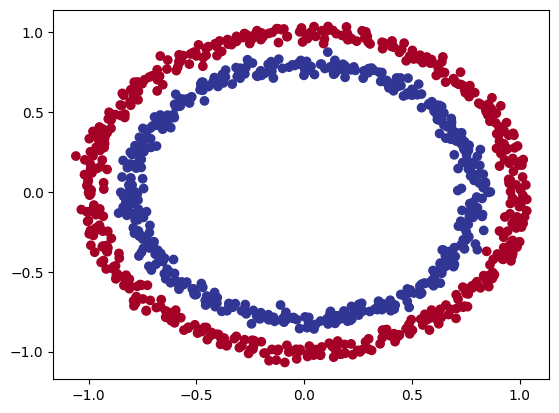

In [90]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [91]:
X.shape, y.shape, len(X), len(y)

((1000, 2), (1000,), 1000, 1000)

In [92]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)


In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
history_2 = model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [94]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 1s 6ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Text(0.5, 0, 'epochs')

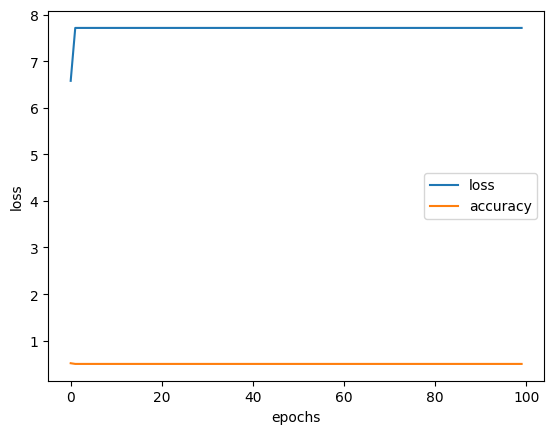

In [96]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> #### Improving the model

In [97]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
history_3 = model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data





Epoch 1/100
32/32 [==============================] - 4s 8ms/step - loss: 2.1779 - accuracy: 0.4630
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 0.7150 - accuracy: 0.5120
Epoch 3/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6949 - accuracy: 0.4920
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6981 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.7001 - accuracy: 0.4640
Epoch 7/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6970 - accuracy: 0.5200
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.5170
Epoch 9/100
32/32 [==============================] - 0s 9ms/step - loss: 0.7011 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6949 - accuracy: 0.4860
Epoch

In [98]:
model_3.evaluate(X,y)

32/32 [==============================] - 1s 7ms/step - loss: 0.7005 - accuracy: 0.5090


[0.7004525065422058, 0.5090000033378601]

Text(0.5, 0, 'epochs')

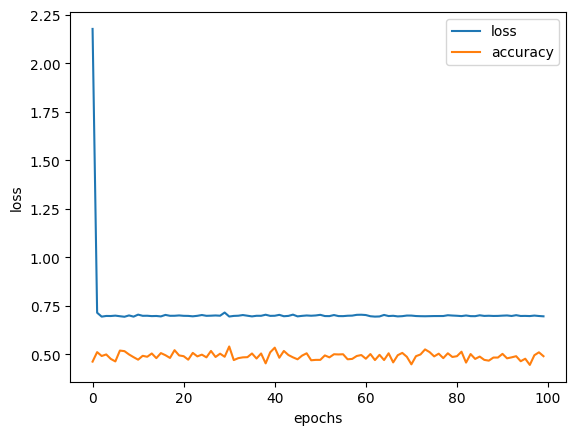

In [99]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [100]:

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 2s 6ms/step
doing binary classifcation...


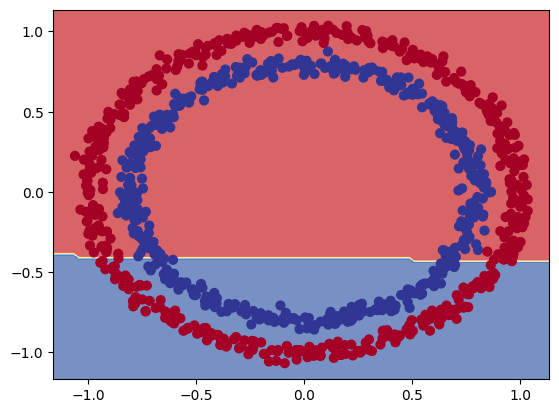

In [102]:
plot_decision_boundary(model_2, X, y)

313/313 [==============================] - 2s 6ms/step
doing binary classifcation...


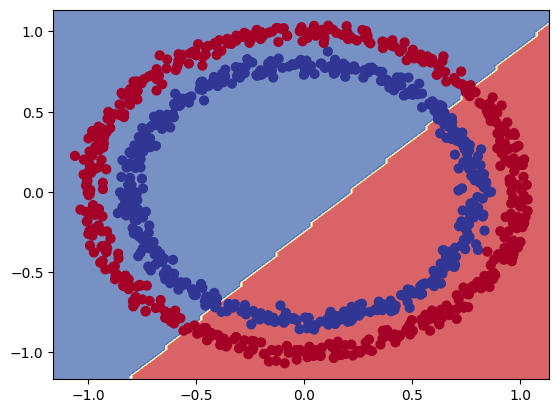

In [101]:
plot_decision_boundary(model_3, X, y)

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # add an extra layer
  tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=("sigmoid"))]
)

model_4.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history_4 = model_4.fit(X_train, y_train, epochs=100)

test_loss, test_accuracy = model_4.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/100
25/25 [==============================] - 4s 8ms/step - loss: 0.7200 - accuracy: 0.4837
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6983 - accuracy: 0.4550
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.5063
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6913 - accuracy: 0.5500
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6884 - accuracy: 0.6037
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6827 - accuracy: 0.6275
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6778 - accuracy: 0.6313
Epoch 8/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6712 - accuracy: 0.6363
Epoch 9/100
25/25 [==============================] - 0s 13ms/step - loss: 0.6651 - accuracy: 0.6637
Epoch 10/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6512 - accuracy: 0.7150
Epoch 1

In [117]:
pd.DataFrame(history_4.history)

,loss,accuracy
0,0.720037,0.48375
1,0.698348,0.45500
2,0.692945,0.50625
3,0.691271,0.55000
4,0.688407,0.60375
...,...,...
95,0.021120,0.99625
96,0.021181,0.99500
97,0.021998,0.99625
98,0.019251,0.99750


Text(0.5, 0, 'epochs')

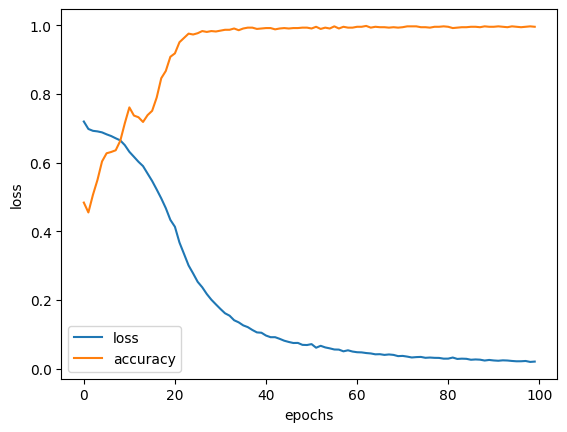

In [111]:
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")



313/313 [==============================] - 2s 6ms/step
doing binary classifcation...


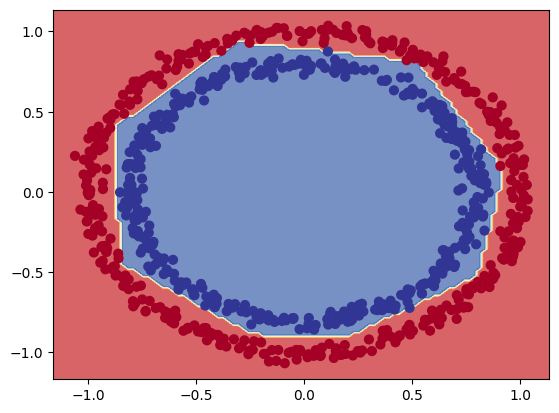

In [ ]:

plot_decision_boundary(model_4, X_train, y_train)

In [ ]:

model_4.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 4)                 12        
                                                                 
 dense_69 (Dense)            (None, 4)                 20        
                                                                 
 dense_70 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


313/313 [==============================] - 2s 6ms/step
doing binary classifcation...
313/313 [==============================] - 2s 6ms/step
doing binary classifcation...


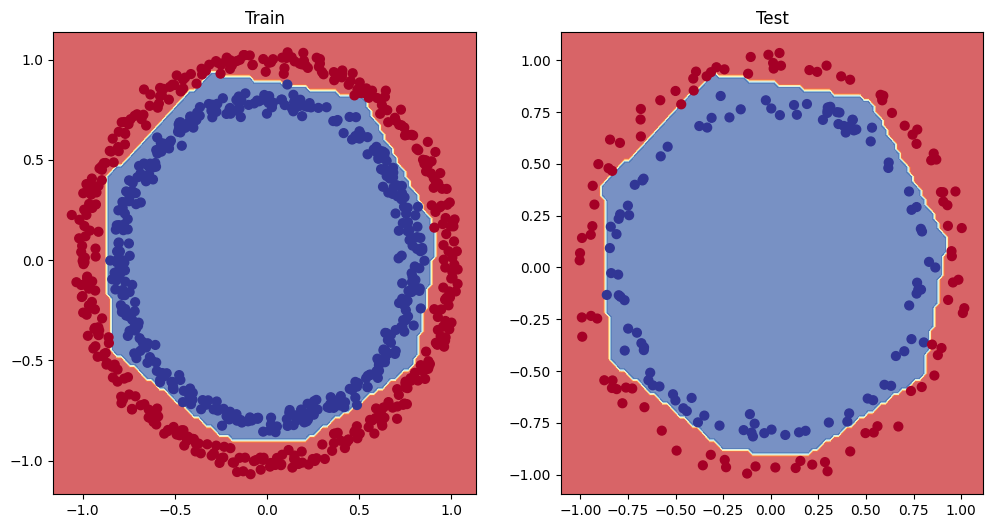

In [ ]:


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X=X_test, y=y_test)
plt.show()

> #### Finding the best learning rate


Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the **learning rate**.

In `model_8` you saw we lowered the Adam optimizer's learning rate from the default of `0.001` (default) to `0.01`.

And you might be wondering why we did this.

Put it this way, it was a lucky guess.

I just decided to try a lower learning rate and see how the model went.

Now you might be thinking, "Seriously? You can do that?"

And the answer is yes. You can change any of the hyperparamaters of your neural networks.

With practice, you'll start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:
* A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
   * You can think of a callback as an extra piece of functionality you can add to your model *while* its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

We'll go through each with code, then explain what's going on.

> 🔑 **Note:** The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the [Adam optimizer's](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [127]:
# Set random seed
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# create lr call back
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_10 = model_10.fit(X_train, y_train, epochs=100, callbacks=[lr_schedular])


Epoch 1/100
25/25 [==============================] - 3s 12ms/step - loss: 0.6991 - accuracy: 0.5113 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 18ms/step - loss: 0.6985 - accuracy: 0.5088 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6980 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6976 - accuracy: 0.5125 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6969 - accuracy: 0.5075 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6964 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6957 - accuracy: 0.5025 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6951 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 7ms/step - los

<AxesSubplot:xlabel='epochs'>

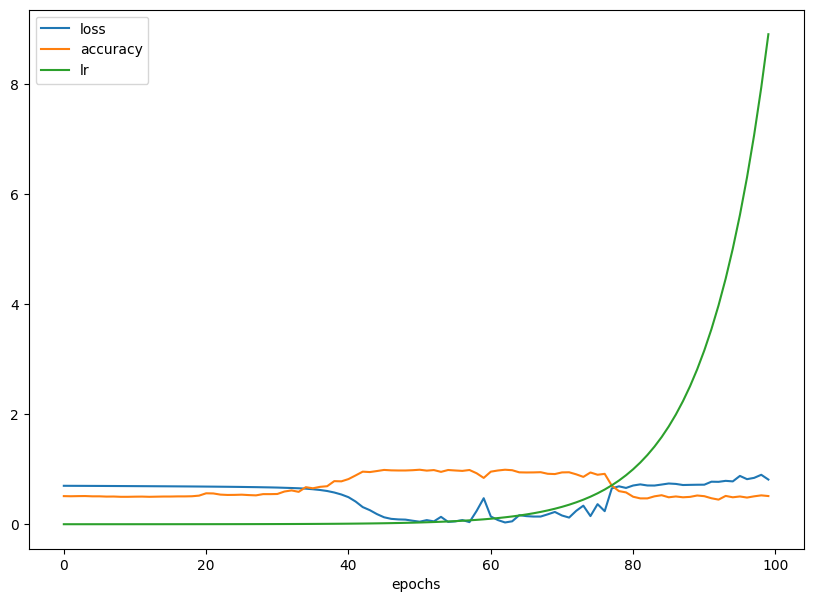

In [ ]:

pd.DataFrame(history_10.history).plot(figsize=(10, 7), xlabel="epochs")
# plt.ylabel("loss")


**How to know the value of the efficient lr**

Text(0, 0.5, 'loss')

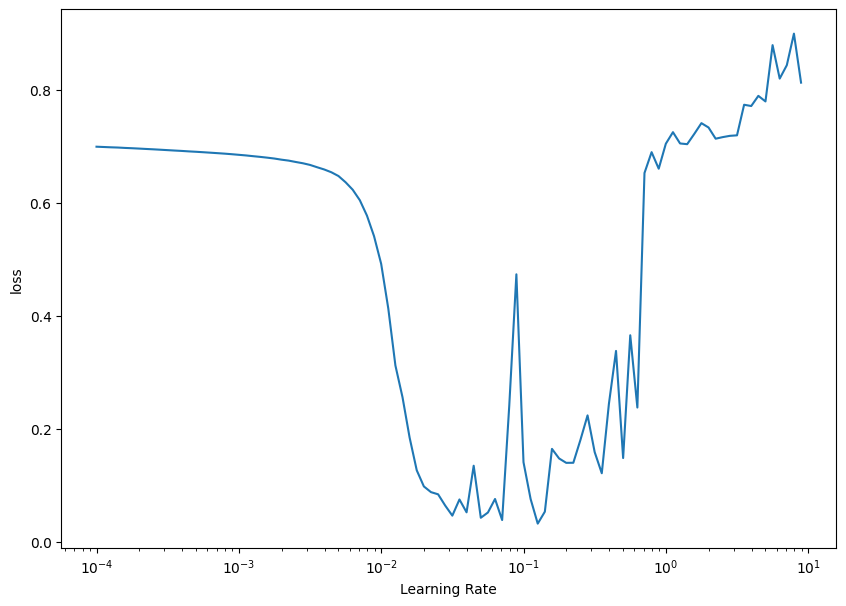

In [130]:
lrs = 1e-4 * (10 ** (tf.range(100)/20)) # 100 no of epochs
# lambda epoch: 1e-4 * 10**(epoch/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel("Learning Rate")                                     
plt.ylabel("loss")


To figure out the ideal value of the learning rate (at least the ideal value to *begin* training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between `0.01` ($10^{-2}$) and `0.02`.

![finding the ideal learning rate by plotting learning rate vs. loss](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-learning-rate-vs-loss.png)

*The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).*

In [137]:
# Set random seed
tf.random.set_seed(42)

best = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
best.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.025), # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# create lr call back
# lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

best_history = best.fit(X_train, y_train, epochs=50) #  callbacks=[lr_schedular]




Epoch 1/50
25/25 [==============================] - 4s 9ms/step - loss: 0.6977 - accuracy: 0.4938
Epoch 2/50
25/25 [==============================] - 0s 10ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 3/50
25/25 [==============================] - 0s 12ms/step - loss: 0.6788 - accuracy: 0.6575
Epoch 4/50
25/25 [==============================] - 0s 10ms/step - loss: 0.6543 - accuracy: 0.6550
Epoch 5/50
25/25 [==============================] - 0s 15ms/step - loss: 0.5832 - accuracy: 0.7200
Epoch 6/50
25/25 [==============================] - 0s 12ms/step - loss: 0.4731 - accuracy: 0.8037
Epoch 7/50
25/25 [==============================] - 0s 18ms/step - loss: 0.3935 - accuracy: 0.8462
Epoch 8/50
25/25 [==============================] - 0s 18ms/step - loss: 0.3238 - accuracy: 0.8750
Epoch 9/50
25/25 [==============================] - 0s 20ms/step - loss: 0.2490 - accuracy: 0.9112
Epoch 10/50
25/25 [==============================] - 0s 18ms/step - loss: 0.2463 - accuracy: 0.9038
Epoch 11/5

<AxesSubplot:>

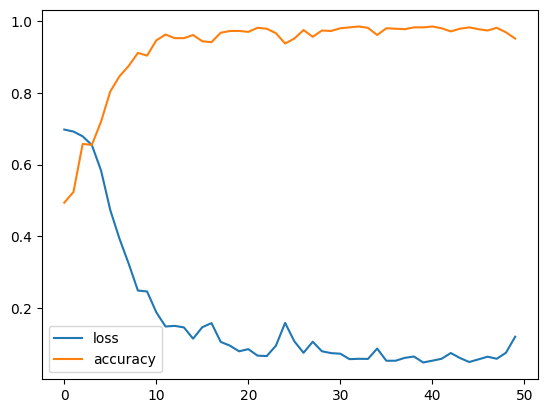

In [138]:
pd.DataFrame(best_history.history).plot()
# plt.ylabel("loss")

In [139]:
best.evaluate(X_test,y_test)

7/7 [==============================] - 1s 8ms/step - loss: 0.3290 - accuracy: 0.9000


[0.3290237486362457, 0.8999999761581421]

In [140]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 1s 7ms/step - loss: 0.9603 - accuracy: 0.5000


[0.9602727293968201, 0.5]

313/313 [==============================] - 2s 6ms/step
doing binary classifcation...
313/313 [==============================] - 2s 6ms/step
doing binary classifcation...


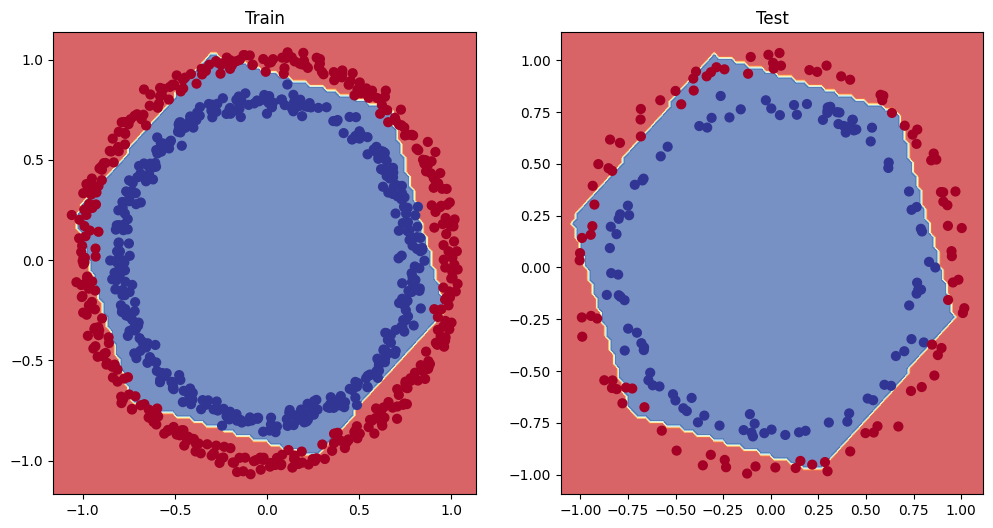

In [141]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(best, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(best, X=X_test, y=y_test)
plt.show;



| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

In [143]:
loss, accuracy = best.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 8ms/step - loss: 0.3290 - accuracy: 0.9000
Model loss on test set: 0.3290237486362457
Model accuracy on test set: 90.00%


How about a confusion matrix?

![anatomy of a confusion matrix](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-anatomy-of-a-confusion-matrix.png)
*Anatomy of a confusion matrix (what we're going to be creating). Correct predictions appear down the diagonal (from top left to bottom right).*

We can make a confusion matrix using [Scikit-Learn's `confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) method.

In [161]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [152]:
y_preds = best.predict(X_test)

confusion_matrix(y_test, y_preds)


7/7 [==============================] - 0s 5ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [153]:
y_preds.shape

(200, 1)

In [154]:
y_test.shape

(200,)

In [157]:
y_preds[:10], y_test[:10]

(array([[9.9999863e-01],
        [1.7055719e-01],
        [9.9999112e-01],
        [9.8068434e-01],
        [9.9056792e-01],
        [7.6052207e-01],
        [9.8096486e-04],
        [6.1611453e-04],
        [9.9985403e-01],
        [3.5208352e-02]], dtype=float32),
 array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0]))

In [158]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [159]:
confusion_matrix(y_test, tf.round(y_preds))

array([[ 80,  20],
       [  0, 100]])

<Figure size 800x600 with 0 Axes>

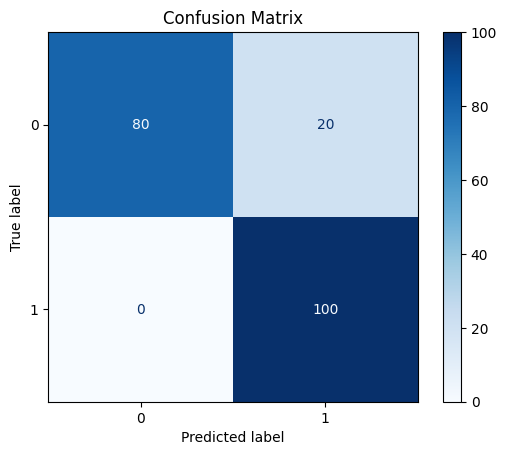

In [162]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, tf.round(y_preds))
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

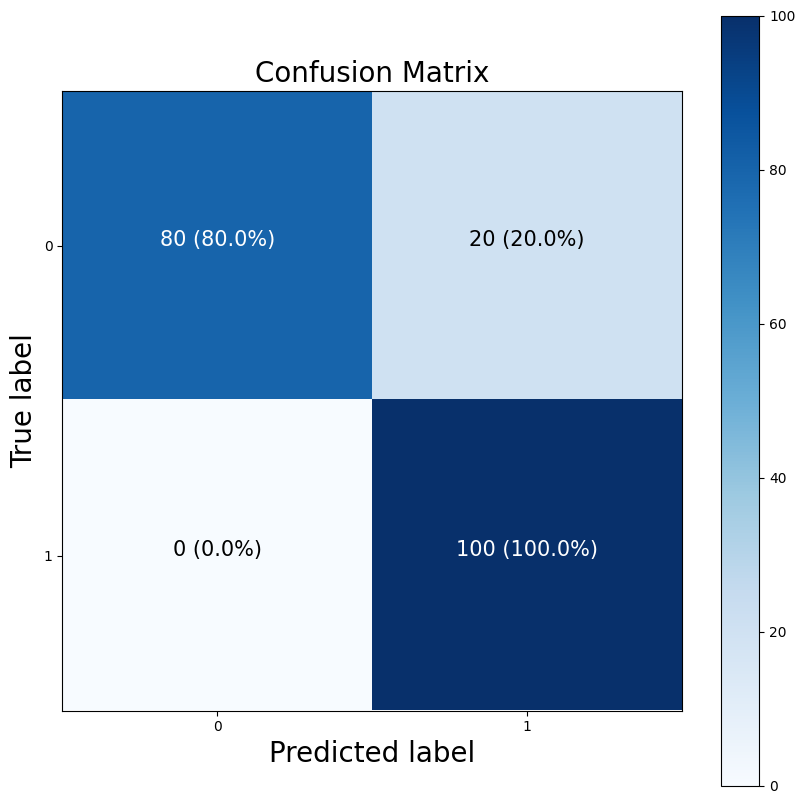

In [163]:

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb



> ### Larger Example

In [164]:
from tensorflow.keras.datasets import fashion_mnist


In [165]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 3s 1us/step


In [166]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [167]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [169]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

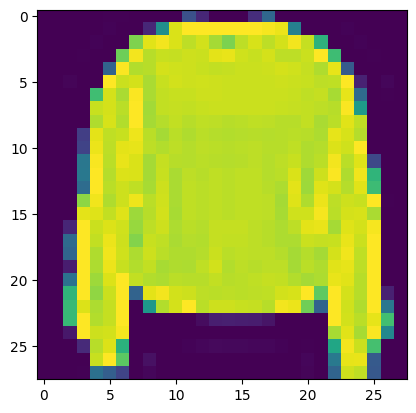

In [170]:
plt.imshow(train_data[7]);

In [171]:
train_labels[7]

2

It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.

Let's create a small list of the class names (we can find them on [the dataset's GitHub page](https://github.com/zalandoresearch/fashion-mnist#labels)).

> 🔑 **Note:** Whilst this dataset has been prepared for us and ready to go, it's important to remember many datasets won't be ready to go like this one. Often you'll have to do a few preprocessing steps to have it ready to use with a neural network (we'll see more of this when we work with our own data later).

In [172]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

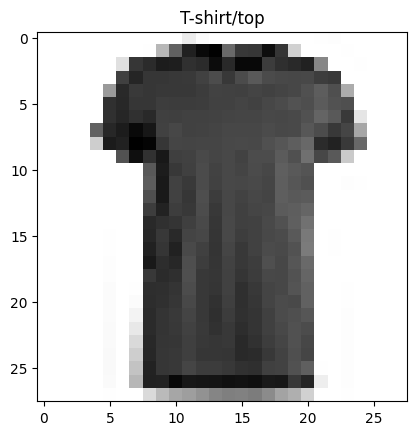

In [173]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

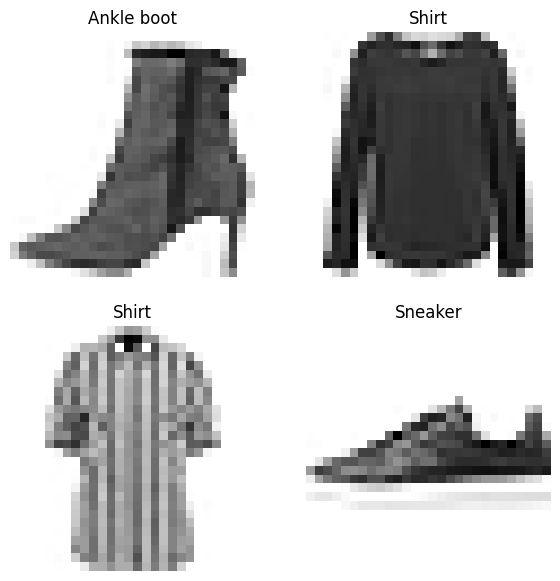

In [175]:
import random 
plt.figure(figsize=(7,7))
for i in range(4):
    ax= plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The **input shape** will have to deal with 28x28 tensors (the height and width of our images).
  * We're actually going to squash the input into a tensor (vector) of shape `(784)`.
* The **output shape** will have to be 10 because we need our model to predict for 10 different classes.
  * We'll also change the `activation` parameter of our output layer to be [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) instead of `'sigmoid'`. As we'll see the `"softmax"` activation function outputs a series of values between 0 & 1 (the same shape as **output shape**, which together add up to ~1. The index with the highest value is predicted by the model to be the most *likely* class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
  * More specifically, since our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
* We'll also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training.

You ready? Let's go.

In [176]:
tf.random.set_seed(42)

model_00 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_00.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

model_00_history = model_00.fit(train_data, 
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))                


Epoch 1/10
1875/1875 [==============================] - 23s 11ms/step - loss: 2.4726 - accuracy: 0.1182 - val_loss: 2.2287 - val_accuracy: 0.1337
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 2.2111 - accuracy: 0.1423 - val_loss: 2.1851 - val_accuracy: 0.1482
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.1585 - accuracy: 0.1612 - val_loss: 2.1411 - val_accuracy: 0.1626
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.9582 - accuracy: 0.2025 - val_loss: 1.7818 - val_accuracy: 0.2124
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.7468 - accuracy: 0.2364 - val_loss: 1.6959 - val_accuracy: 0.2790
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.6865 - accuracy: 0.2726 - val_loss: 1.6457 - val_accuracy: 0.3015
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 1.6429 - accuracy: 0.2907 - val_loss: 1.6963 - val_

In [177]:
model_00.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_92 (Dense)            (None, 4)                 3140      
                                                                 
 dense_93 (Dense)            (None, 4)                 20        
                                                                 
 dense_94 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Well, right now, the data we have isn't between 0 and 1, in other words, it's not normalized (hence why we used the `model_00_history` variable when calling `fit()`). It's pixel values are between 0 and 255.


In [178]:
train_data.min(), train_data.max()

(0, 255)

In [179]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

norm_01_ = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

norm_01_.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_01_history = model_00.fit(train_data, 
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))                

"""  
history.history = {
    'loss': [...],       # Training loss for each epoch
    'accuracy': [...],   # Training accuracy for each epoch (if defined)
    'val_loss': [...],   # Validation loss for each epoch (if validation data is provided)
    'val_accuracy': [...]# Validation accuracy for each epoch (if validation data is provided)
}

"""

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 1.3488 - accuracy: 0.4340 - val_loss: 1.0971 - val_accuracy: 0.5185
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.9750 - accuracy: 0.6040 - val_loss: 0.9093 - val_accuracy: 0.6670
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.8318 - accuracy: 0.7027 - val_loss: 0.7905 - val_accuracy: 0.7393
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.7323 - accuracy: 0.7527 - val_loss: 0.7274 - val_accuracy: 0.7559
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6875 - accuracy: 0.7638 - val_loss: 0.6956 - val_accuracy: 0.7637
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6637 - accuracy: 0.7701 - val_loss: 0.6873 - val_accuracy: 0.7620
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6495 - accuracy: 0.7736 - val_loss: 0.6733 - val_a

In [187]:
history_df_model_00_history = pd.DataFrame(model_00_history.history)
history_df_model_00_history.head(5)

,loss,accuracy,val_loss,val_accuracy
0,2.472609,0.118150,2.228688,0.1337
1,2.211133,0.142300,2.185117,0.1482
2,2.158460,0.161250,2.141112,0.1626
3,1.958213,0.202533,1.781783,0.2124
4,1.746814,0.236367,1.695914,0.2790


In [186]:
history_df = pd.DataFrame(norm_01_history.history)
history_df.head(5)

,loss,accuracy,val_loss,val_accuracy
0,1.348785,0.434033,1.097083,0.5185
1,0.975011,0.603950,0.909334,0.6670
2,0.831830,0.702683,0.790457,0.7393
3,0.732271,0.752650,0.727432,0.7559
4,0.687496,0.763767,0.695620,0.7637


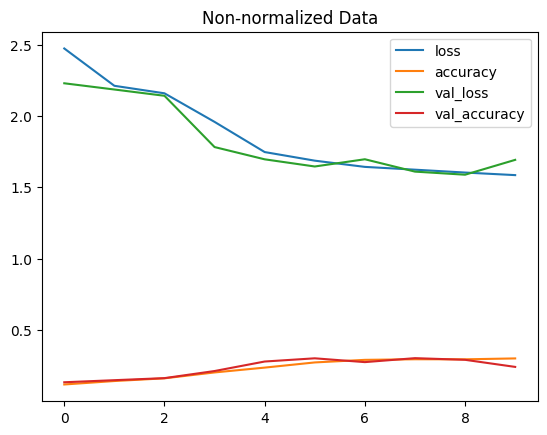

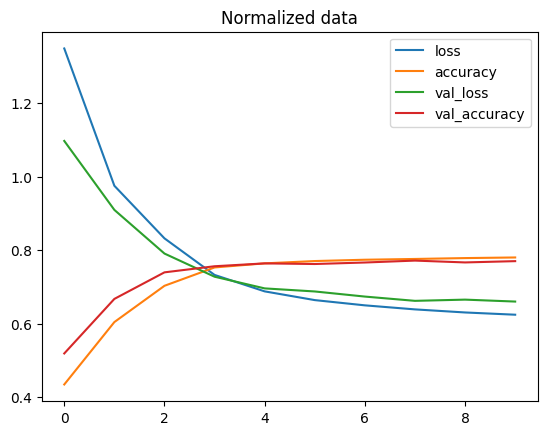

In [181]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(model_00_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_01_history.history).plot(title="Normalized data");

In [188]:
tf.random.set_seed(42)

model_02=  tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

model_02.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics= ["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


find_lr_history = model_02.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 19s 9ms/step - loss: 1.9181 - accuracy: 0.2224 - val_loss: 1.7332 - val_accuracy: 0.3077 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 18s 10ms/step - loss: 1.6184 - accuracy: 0.3142 - val_loss: 1.5497 - val_accuracy: 0.3327 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 15s 8ms/step - loss: 1.4962 - accuracy: 0.3449 - val_loss: 1.4855 - val_accuracy: 0.3613 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 15s 8ms/step - loss: 1.3924 - accuracy: 0.4249 - val_loss: 1.3581 - val_accuracy: 0.4273 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 16s 9ms/step - loss: 1.3219 - accuracy: 0.4402 - val_loss: 1.3181 - val_accuracy: 0.4697 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 17s 9ms/step - loss: 1.2748 - accuracy: 0.4566 - val_loss: 1.2111 - val_accuracy: 0.5332 - lr: 0.0018
Epoch 7/40
1875/1875 [=============================

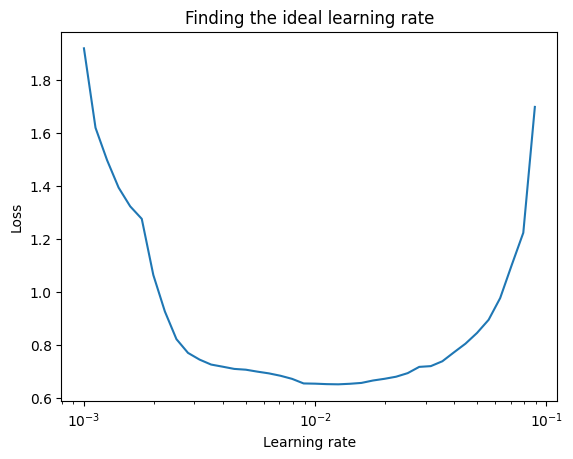

In [189]:

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [241]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_04 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_04.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_04.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 19s 9ms/step - loss: 1.1273 - accuracy: 0.5324 - val_loss: 0.9037 - val_accuracy: 0.6425
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.9019 - accuracy: 0.6247 - val_loss: 0.9093 - val_accuracy: 0.6597
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8679 - accuracy: 0.6390 - val_loss: 0.8705 - val_accuracy: 0.6374
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.8543 - accuracy: 0.6478 - val_loss: 0.9173 - val_accuracy: 0.6341
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8399 - accuracy: 0.6607 - val_loss: 0.8266 - val_accuracy: 0.6651
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8202 - accuracy: 0.6844 - val_loss: 0.8208 - val_accuracy: 0.7146
Epoch 7/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.8077 - accuracy: 0.7060 - val_loss: 0.8071 - val_ac

In [ ]:
# # Note: The following confusion matrix code is a remix of Scikit-Learn's
# # plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# # and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

# import itertools
# from sklearn.metrics import confusion_matrix


# def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
#     cm = confusion_matrix(y_true, y_pred)
#     cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # if cm 2*2 --> op  2*1
#     n_classes = cm.shape[0]

#     fig, ax = plt.subplots(figsize= figsize)
#     cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
#     fig.colorbar(cax)    

#     if classes:
#         labels = classes
#     else:
#         labels = np.arange(cm.shape[0])
    
#     ax.set(title= "Confusion Matrix",
#             xlabel= "Predicted label",
#             ylabel= "True label",
#             xtricks= np.arange(n_classes),# create enough axis slots for each class
#             ytricks=np.arange(n_classes),
#             xticklabels=labels, # axes will labeled with class names (if they exist) or ints
#             yticklabels=labels)      
#     # Make x-axis labels appear on bottom
#     ax.xaxis.set_label_position("bottom")
#     ax.xaxis.tick_bottom()

#     # set threshold for different colors
#     threshold = (cm.max() + cm.min) / 2.
#     # plot text on each cell
#     for i , j in itertools.product(range(cm.shape[0], range(cm.shape[1]))):
#         plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > threshold else "black",
#                  size=text_size)


In [242]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [243]:
y_probs_04 = model_04.predict(test_data) # "probs" is short for probabilities

y_probs_04[:5]

147/313 [=============>................] - ETA: 1s

313/313 [==============================] - 3s 8ms/step


array([[1.08673512e-15, 3.89765519e-18, 3.86027880e-14, 3.65513869e-10,
        4.53716682e-11, 1.00816444e-01, 1.26107924e-12, 1.49408132e-01,
        5.03438923e-06, 7.49770343e-01],
       [3.99417739e-04, 3.95686121e-16, 7.34723985e-01, 7.98417865e-09,
        2.27860540e-01, 4.42943617e-28, 3.70144024e-02, 1.14633484e-26,
        1.68577390e-06, 0.00000000e+00],
       [9.95085202e-03, 9.52217937e-01, 1.44558853e-05, 3.76694426e-02,
        2.12266491e-06, 2.85308142e-05, 1.16603311e-04, 3.55547747e-09,
        2.39494362e-08, 2.69113509e-09],
       [9.95085202e-03, 9.52217937e-01, 1.44558853e-05, 3.76694426e-02,
        2.12266491e-06, 2.85308142e-05, 1.16603311e-04, 3.55547747e-09,
        2.39494362e-08, 2.69113509e-09],
       [2.29938596e-01, 1.56802213e-04, 1.57316625e-01, 1.40498713e-01,
        1.39182895e-01, 9.66179101e-08, 3.30308050e-01, 2.84075519e-09,
        2.59830803e-03, 4.37922937e-15]], dtype=float32)

In [244]:
y_probs_04[0].argmax(),  class_names[y_probs_04[0].argmax()]

(9, 'Ankle boot')

In [245]:
y_preds_04 = y_probs_04.argmax(axis=1)  
y_preds_04[:5]

array([9, 2, 1, 1, 6])

In [246]:
len(y_preds_04)

10000

In [247]:
y_preds_04.shape

(10000,)

In [248]:
test_labels.shape

(10000,)

In [249]:
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds_04)

array([[794,   2,  28, 125,  25,   1,  11,   0,  14,   0],
       [ 22, 918,   1,  51,   3,   0,   4,   0,   1,   0],
       [ 61,   0, 514,  21, 299,   1,  96,   0,   8,   0],
       [ 71,  10,   5, 809,  36,  12,  42,   0,  15,   0],
       [  6,   0,  88,  47, 791,   0,  53,   0,  15,   0],
       [  0,   0,   0,  12,   0, 750,   0,  80,  17, 141],
       [234,   0, 118, 104, 398,   1, 126,   0,  19,   0],
       [  0,   0,   0,   0,   0,  57,   0, 802,   1, 140],
       [  1,   0,   4,  17,  63,   6,   7,   6, 894,   2],
       [  0,   0,   0,   0,   1,  29,   0,  15,   0, 955]])

In [250]:
comparison_series = pd.Series(test_labels == y_preds_04)

# Use value_counts to get counts of True and False
value_counts = comparison_series.value_counts()
print(value_counts)

True     7353
False    2647
dtype: int64


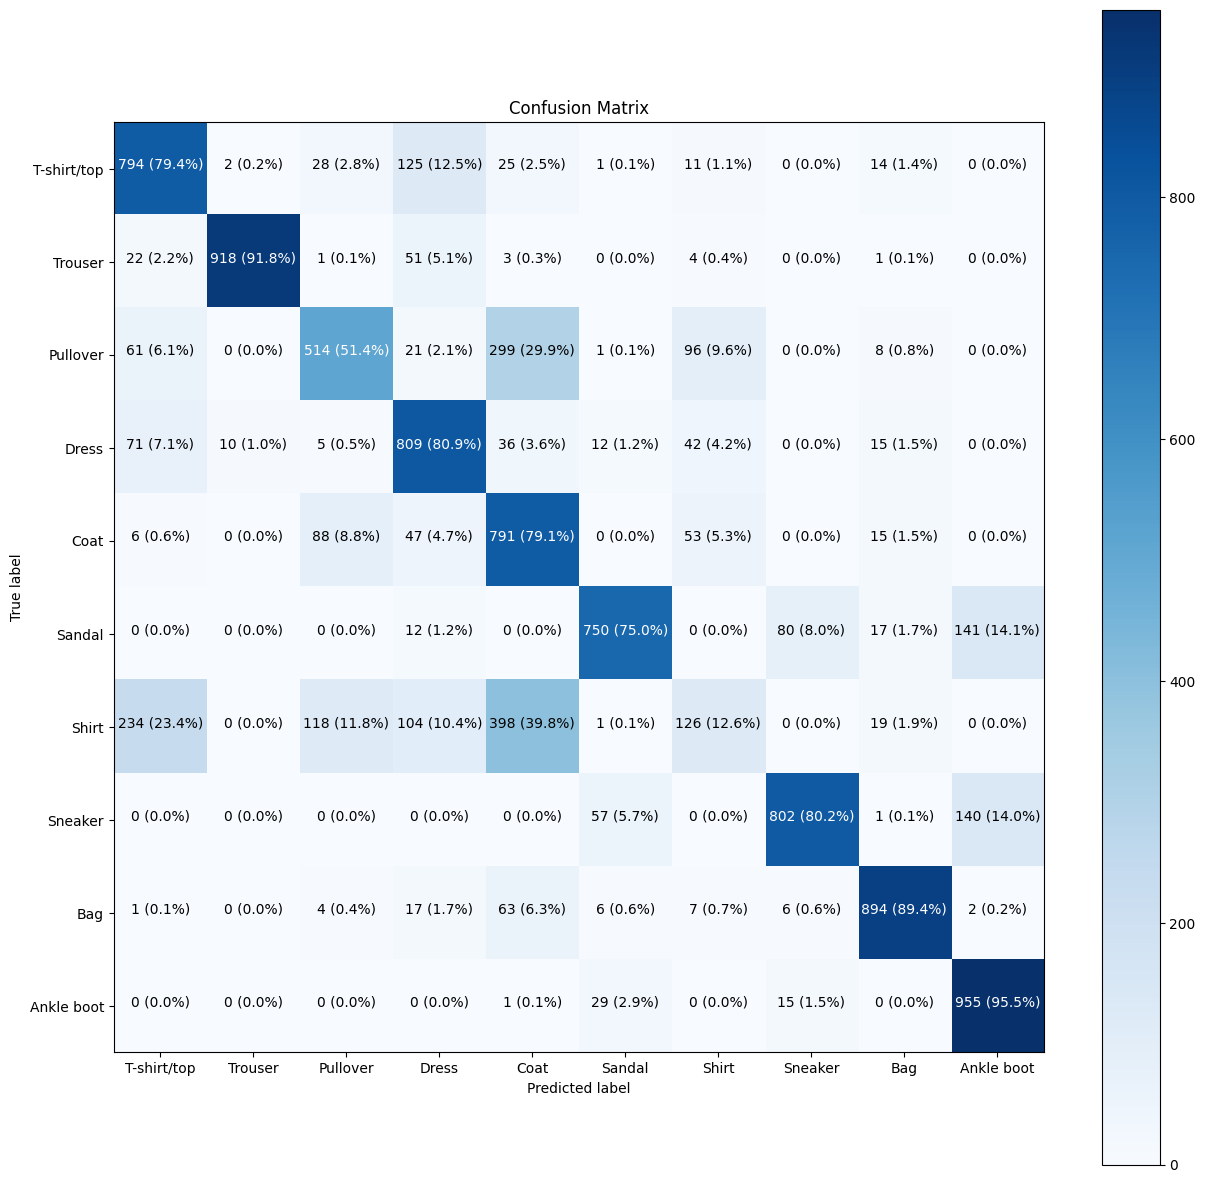

In [260]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds_04,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [252]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 83ms/step


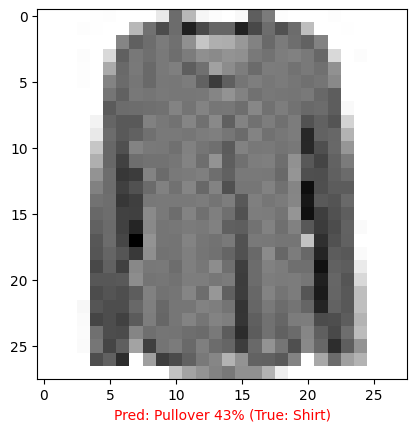

In [253]:
# Check out a random image as well as its prediction
plot_random_image(model=model_04,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [254]:
model_04.layers

In [255]:
model_04.layers[1]

And we can find the patterns learned by a particular layer using the `get_weights()` method.

The `get_weights()` method returns the **weights** (also known as a weights matrix) and biases (also known as a bias vector) of a particular layer.

In [256]:
weights, biases = model_04.layers[1].get_weights()
weights, weights.shape

(array([[-0.06181395, -0.0304077 ,  0.03701497, -2.127626  ],
        [-2.4819763 ,  0.06419781, -0.04286218, -6.534536  ],
        [-6.2464633 ,  0.01576737,  0.01540203,  3.71356   ],
        ...,
        [-1.3024095 ,  0.0359711 , -0.00831193, -4.8017054 ],
        [-1.6510534 , -0.00976761,  0.05287655, -6.07142   ],
        [-1.6998097 , -0.03492901, -0.02917999, -1.8662615 ]],
       dtype=float32),
 (784, 4))

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the [`kernel_initializer` parameter](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) when creating a layer, the default is [`"glorot_uniform"`](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform)) and are then updated to better representative values of the data (non-random) by the neural network during training.

![neural network supervised learning weight updates](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-fashion-mnist-learning.png)
*Example workflow of how a supervised neural network starts with random weights and updates them to better represent the data by looking at examples of ideal outputs.*

Now let's check out the bias vector.

In [257]:
biases, biases.shape

(array([14.301911  , -0.06005332, -0.06005168, 11.728212  ], dtype=float32),
 (4,))

In [258]:
model_04.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_110 (Dense)           (None, 4)                 3140      
                                                                 
 dense_111 (Dense)           (None, 4)                 20        
                                                                 
 dense_112 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


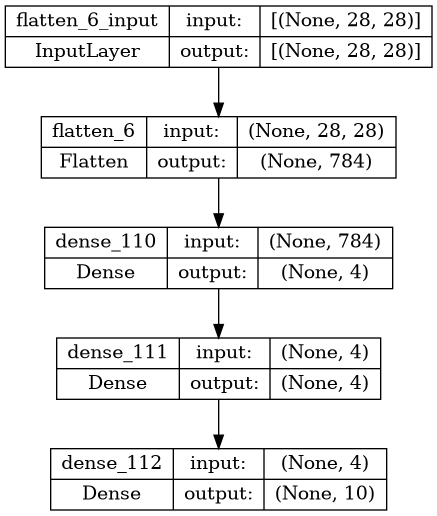

In [259]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_04, show_shapes=True)